# Filesystem

In [101]:
import csv
import pandas as pd
import requests
import py7zr
from pathlib import Path
from datetime import datetime, date, time, timedelta
import shutil
import exif
import exifread

## Read lines with open

In [4]:
f = open('data/cities.csv', encoding='UTF-8')
f

<_io.TextIOWrapper name='data/cities.csv' mode='r' encoding='UTF-8'>

In [5]:
f.read()

'name,population,cp\nPau,77000,64000\nToulouse,477000,31000\nNîmes,150000,30000\n'

In [6]:
f.read()

''

In [7]:
f.close()

In [8]:
f.closed

True

In [20]:
f = open('data/cities.csv', encoding='UTF-8')
for line in f:
    print(line)
f.close()

name,population,cp

Pau,77000,64000

Toulouse,477000,31000

Nîmes,150000,30000



In [12]:
f = open('data/cities_fr.csv', encoding='CP1252')
for line in f:
    print(line)
f.close()

name;population;cp

Pau;77000;64000

Toulouse;477000;31000

Nîmes;150000;30000



In [14]:
city = "Nîmes"
for encoding in "CP1252", "ISO-8859-1", "ISO-8859-15", "UTF-8":
    print(encoding, '->', city.encode(encoding))

CP1252 -> b'N\xeemes'
ISO-8859-1 -> b'N\xeemes'
ISO-8859-15 -> b'N\xeemes'
UTF-8 -> b'N\xc3\xaemes'


In [16]:
word = "€"
for encoding in "CP1252", "ISO-8859-1", "ISO-8859-15", "UTF-8":
    try:
        print(encoding, '->', word.encode(encoding))
    except UnicodeEncodeError:
        print(f"Can't encode '{word}' with encoding '{encoding}'")

CP1252 -> b'\x80'
Can't encode '€' with encoding 'ISO-8859-1'
ISO-8859-15 -> b'\xa4'
UTF-8 -> b'\xe2\x82\xac'


In [17]:
city = "東京"
code = city.encode('UTF-8')
code

b'\xe6\x9d\xb1\xe4\xba\xac'

In [18]:
code.decode('UTF-8')

'東京'

## Split lines

In [28]:
f = open('data/cities_fr.csv', encoding='CP1252')
sep = ";"
next(f)
cities = []
for line in f:
    data = line.rstrip().split(sep)
    data[1] = int(data[1])
    cities.append(data)
f.close()
cities

[['Pau', 77000, '64000'],
 ['Toulouse', 477000, '31000'],
 ['Nîmes', 150000, '30000']]

## Read csv with pandas
pandas 2D array = DataFrame

In [36]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [37]:
df_cities = pd.read_csv('data/cities.csv', dtype={'cp': 'str'})
df_cities

,name,population,cp
0,Pau,77000,64000
1,Toulouse,477000,31000
2,Nîmes,150000,30000
3,Foix,9706,09000


In [38]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   population  4 non-null      int64 
 2   cp          4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [39]:
type(df_cities)

pandas.core.frame.DataFrame

In [40]:
df_cities.population

0     77000
1    477000
2    150000
3      9706
Name: population, dtype: int64

In [41]:
df_cities['population']

0     77000
1    477000
2    150000
3      9706
Name: population, dtype: int64

In [44]:
type(df_cities.population)

pandas.core.series.Series

In [42]:
sum(df_cities.population)

713706

In [45]:
total_population = df_cities.population.sum()
min_population = df_cities.population.min()
max_population = df_cities.population.max()
avg_population = df_cities.population.mean()
print(f"population: total={total_population}, min={min_population}, max={max_population}, average={avg_population}")

population: total=713706, min=9706, max=477000, average=178426.5


In [50]:
df_cities.to_json('data/cities.json', orient='records')

## Read csv with module csv

In [59]:
f = open('data/cities.csv', newline='', encoding='UTF-8')
csv_reader = csv.reader(f, delimiter=",")
headers = next(csv_reader)
print("Headers:", headers)
cities = []
for data in csv_reader:
    data_converted = (data[0], int(data[1]), data[2])
    cities.append(data_converted)
    print("Row:", data_converted)
f.close()
cities

Headers: ['name', 'population', 'cp']
Row: ('Pau', 77000, '64000')
Row: ('Toulouse', 477000, '31000')
Row: ('Nîmes', 150000, '30000')
Row: ('Foix', 9706, '09000')


[('Pau', 77000, '64000'),
 ('Toulouse', 477000, '31000'),
 ('Nîmes', 150000, '30000'),
 ('Foix', 9706, '09000')]

In [60]:
f = open('data/cities.csv', newline='', encoding='UTF-8')
csv_reader = csv.reader(f, delimiter=",")
headers = next(csv_reader)
print("Headers:", headers)
cities = []
for name, population, cp in csv_reader:
    data_converted = (name, int(population), cp)
    cities.append(data_converted)
    print("Row:", data_converted)
f.close()
cities

Headers: ['name', 'population', 'cp']
Row: ('Pau', 77000, '64000')
Row: ('Toulouse', 477000, '31000')
Row: ('Nîmes', 150000, '30000')
Row: ('Foix', 9706, '09000')


[('Pau', 77000, '64000'),
 ('Toulouse', 477000, '31000'),
 ('Nîmes', 150000, '30000'),
 ('Foix', 9706, '09000')]

In [63]:
df_cities = pd.DataFrame(cities, columns=headers)
df_cities

,name,population,cp
0,Pau,77000,64000
1,Toulouse,477000,31000
2,Nîmes,150000,30000
3,Foix,9706,09000


## All cities in France
source: https://www.data.gouv.fr/fr/datasets/villes-de-france/

In [65]:
df_cities_fr = pd.read_csv('data/cities_gouv.csv')
df_cities_fr

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
3,25619,les villedieu,25240,les villedieu,46.713906,6.265831,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
4,25622,villers buzon,25170,villers buzon,47.228558,5.852187,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
...,...,...,...,...,...,...,...,...,...,...
39140,98829,thio,98829,thio,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39141,98831,voh,98833,voh,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39142,98832,yate,98834,yate,NaN,NaN,nouvelle-calédonie,988,nouvelle-calédonie,Nouvelle Calédonie
39143,98612,sigave,98620,sigave,-14.270411,-178.155263,wallis-et-futuna,986,wallis-et-futuna,Wallis-et-Futuna


In [66]:
df_cities_fr.loc[df_cities_fr.label.str.match('nimes')]

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
21274,30189,nimes,30000,nimes,43.844658,4.347591,gard,30,occitanie,Occitanie
21668,30189,nimes,30900,nimes,43.844658,4.347591,gard,30,occitanie,Occitanie
24177,30189,nimes,30900,nimes,43.844658,4.347591,gard,30,occitanie,Occitanie


## Photos classifier

In [9]:
archive_url = "https://drive.usercontent.google.com/u/0/uc?id=1snAfzMO4kMahMEDsE8HxahrQunfpXKwa&export=download"

In [10]:
r = requests.get(archive_url)
r

<Response [200]>

In [11]:
r.status_code

200

In [12]:
r.headers

{'Content-Type': 'application/octet-stream', 'Content-Security-Policy': "sandbox, default-src 'none', frame-ancestors 'none'", 'X-Content-Security-Policy': 'sandbox', 'Cross-Origin-Opener-Policy': 'same-origin', 'Cross-Origin-Embedder-Policy': 'require-corp', 'Cross-Origin-Resource-Policy': 'same-site', 'X-Content-Type-Options': 'nosniff', 'Content-Disposition': 'attachment; filename="Photos.7z"', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'false', 'Access-Control-Allow-Headers': 'Accept, Accept-Language, Authorization, Cache-Control, Content-Disposition, Content-Encoding, Content-Language, Content-Length, Content-MD5, Content-Range, Content-Type, Date, developer-token, financial-institution-id, X-Goog-Sn-Metadata, X-Goog-Sn-PatientId, GData-Version, google-cloud-resource-prefix, linked-customer-id, login-customer-id, x-goog-request-params, Host, If-Match, If-Modified-Since, If-None-Match, If-Unmodified-Since, Origin, OriginToken, Pragma, Range, request-id,

In [13]:
r.headers['Content-Type']

'application/octet-stream'

In [21]:
archive_filename = 'data/photos.7z'
with open(archive_filename, mode='wb') as f:
    f.write(r.content)
# auto: f.close()

In [22]:
py7zr.SevenZipFile.extractall?

Signature:
py7zr.SevenZipFile.extractall(
    self,
    path: Optional[Any] = None,
    callback: Optional[py7zr.callbacks.ExtractCallback] = None,
) -> None
Docstring:
Extract all members from the archive to the current working
directory and set owner, modification time and permissions on
directories afterwards. ``path`` specifies a different directory
to extract to.
File:      c:\users\matthias\anaconda3\envs\env312\lib\site-packages\py7zr\py7zr.py
Type:      function

In [25]:
archive_path = Path(archive_filename)
archive_path

WindowsPath('data/photos.7z')

In [26]:
print(archive_path)

data\photos.7z


In [27]:
archive_path.exists()

True

In [28]:
archive_path.absolute()

WindowsPath('C:/Users/Matthias/Documents/Formations/Python/StagePOE/data/photos.7z')

In [31]:
archive_path.is_file(), \
archive_path.is_dir()

(True, False)

In [32]:
archive_path.parent

WindowsPath('data')

In [34]:
for p in archive_path.absolute().parents:
    print(p)

C:\Users\Matthias\Documents\Formations\Python\StagePOE\data
C:\Users\Matthias\Documents\Formations\Python\StagePOE
C:\Users\Matthias\Documents\Formations\Python
C:\Users\Matthias\Documents\Formations
C:\Users\Matthias\Documents
C:\Users\Matthias
C:\Users
C:\


In [36]:
with py7zr.SevenZipFile(archive_path, mode='r') as arc:
    arc.extractall(path=archive_path.parent)

In [38]:
photo_dir = archive_path.parent / 'Photos' / 'Set1'
print(photo_dir)
print(photo_dir.exists())
print(photo_dir.is_dir())

data\Photos\Set1
True
True


In [40]:
for f in photo_dir.iterdir():
    print(f)

data\Photos\Set1\IMG_20200711_090914.jpg
data\Photos\Set1\IMG_20200711_110837.jpg
data\Photos\Set1\IMG_20200711_120450.jpg
data\Photos\Set1\IMG_20200731_112734.jpg
data\Photos\Set1\IMG_20200731_124909.jpg
data\Photos\Set1\IMG_20200731_124939.jpg
data\Photos\Set1\IMG_20200731_134742.jpg
data\Photos\Set1\IMG_20200809_101205.jpg
data\Photos\Set1\IMG_20200809_111130.jpg
data\Photos\Set1\IMG_20200809_124231.jpg
data\Photos\Set1\IMG_20200809_125816.jpg
data\Photos\Set1\IMG_20200821_104500.jpg
data\Photos\Set1\IMG_20200905_113751.jpg
data\Photos\Set1\IMG_20200913_192604.jpg
data\Photos\Set1\IMG_20200927_122751.jpg
data\Photos\Set1\IMG_20200927_131116.jpg
data\Photos\Set1\IMG_20200927_152228.jpg
data\Photos\Set1\IMG_20201024_155325.jpg


In [41]:
for f in photo_dir.glob("*.jpg"):
    print(f)

data\Photos\Set1\IMG_20200711_090914.jpg
data\Photos\Set1\IMG_20200711_110837.jpg
data\Photos\Set1\IMG_20200711_120450.jpg
data\Photos\Set1\IMG_20200731_112734.jpg
data\Photos\Set1\IMG_20200731_124909.jpg
data\Photos\Set1\IMG_20200731_124939.jpg
data\Photos\Set1\IMG_20200731_134742.jpg
data\Photos\Set1\IMG_20200809_101205.jpg
data\Photos\Set1\IMG_20200809_111130.jpg
data\Photos\Set1\IMG_20200809_124231.jpg
data\Photos\Set1\IMG_20200809_125816.jpg
data\Photos\Set1\IMG_20200821_104500.jpg
data\Photos\Set1\IMG_20200905_113751.jpg
data\Photos\Set1\IMG_20200913_192604.jpg
data\Photos\Set1\IMG_20200927_122751.jpg
data\Photos\Set1\IMG_20200927_131116.jpg
data\Photos\Set1\IMG_20200927_152228.jpg
data\Photos\Set1\IMG_20201024_155325.jpg


In [43]:
for f in photo_dir.parent.glob("**/*.jpg"):
    print(f)

data\Photos\Set1\IMG_20200711_090914.jpg
data\Photos\Set1\IMG_20200711_110837.jpg
data\Photos\Set1\IMG_20200711_120450.jpg
data\Photos\Set1\IMG_20200731_112734.jpg
data\Photos\Set1\IMG_20200731_124909.jpg
data\Photos\Set1\IMG_20200731_124939.jpg
data\Photos\Set1\IMG_20200731_134742.jpg
data\Photos\Set1\IMG_20200809_101205.jpg
data\Photos\Set1\IMG_20200809_111130.jpg
data\Photos\Set1\IMG_20200809_124231.jpg
data\Photos\Set1\IMG_20200809_125816.jpg
data\Photos\Set1\IMG_20200821_104500.jpg
data\Photos\Set1\IMG_20200905_113751.jpg
data\Photos\Set1\IMG_20200913_192604.jpg
data\Photos\Set1\IMG_20200927_122751.jpg
data\Photos\Set1\IMG_20200927_131116.jpg
data\Photos\Set1\IMG_20200927_152228.jpg
data\Photos\Set1\IMG_20201024_155325.jpg
data\Photos\Set2\IMG_20200821_104500.jpg
data\Photos\Set2\IMG_20200821_112947.jpg
data\Photos\Set2\IMG_20200823_120734.jpg
data\Photos\Set2\IMG_20200823_123302.jpg
data\Photos\Set2\IMG_20200823_125206.jpg
data\Photos\Set2\IMG_20200905_113751.jpg
data\Photos\Set2

Exo: 
- list all photos (jpeg) in photo_dir with:
     - filename
     - file size
     -  date (last modified)
- choose a dest_dir to classify the photos
- move each photo to dest_dir in a sub-directory according to tag date: year/month/day
- if photo already exists => warning + did not move

In [57]:
print("Photos of directory:", photo_dir)
for f in photo_dir.glob("*.jpg"):
    stats = f.stat()
    last_mofied = datetime.fromtimestamp(stats.st_mtime)
    print(f"\t- {f.name}: size={stats.st_size} bytes, last modified={last_mofied:%d/%m/%Y %H:%M}")

Photos of directory: data\Photos\Set1
	- IMG_20200711_090914.jpg: size=48083 bytes, last modified=28/05/2024 09:34
	- IMG_20200711_110837.jpg: size=43470 bytes, last modified=28/05/2024 09:34
	- IMG_20200711_120450.jpg: size=49669 bytes, last modified=28/05/2024 09:34
	- IMG_20200731_112734.jpg: size=30569 bytes, last modified=28/05/2024 09:34
	- IMG_20200731_124909.jpg: size=44207 bytes, last modified=28/05/2024 09:34
	- IMG_20200731_124939.jpg: size=41638 bytes, last modified=28/05/2024 09:34
	- IMG_20200731_134742.jpg: size=42858 bytes, last modified=28/05/2024 09:34
	- IMG_20200809_101205.jpg: size=34288 bytes, last modified=28/05/2024 09:34
	- IMG_20200809_111130.jpg: size=53158 bytes, last modified=28/05/2024 09:34
	- IMG_20200809_124231.jpg: size=43830 bytes, last modified=28/05/2024 09:34
	- IMG_20200809_125816.jpg: size=47736 bytes, last modified=28/05/2024 09:34
	- IMG_20200821_104500.jpg: size=42500 bytes, last modified=28/05/2024 09:34
	- IMG_20200905_113751.jpg: size=39631

In [58]:
# conver a timestamp approximately in years
1716881640.7816925 /3600 / 24 / 365

54.441959689931906

In [73]:
# photo_dir = Path('data/Photos/Set1')
photo_dir = Path('data/Photos/Set2')

In [75]:
dest_dir = Path('photos')
cpt_ok = 0
cpt_ko = 0
for photo_src_path in photo_dir.glob("*.jpg"):
    tag_date = photo_src_path.name[4:12]
    year = tag_date[:4]
    month = tag_date[4:6]
    day = tag_date[6:]
    # print(year, month, day)
    photo_dest_dir = dest_dir / year / month / day
    photo_dest_dir.mkdir(parents=True, exist_ok=True)
    photo_dest_path = photo_dest_dir / photo_src_path.name
    # print(photo_dest_path)
    if photo_dest_path.exists():
        print(f"Skip: {photo_dest_path.name} (already exists)")
        cpt_ko += 1
        continue
    photo_src_path.rename(photo_dest_path)
    cpt_ok += 1
print(f'Summary: moved={cpt_ok}, skipped={cpt_ko}')

Skip: IMG_20200821_104500.jpg (already exists)
Skip: IMG_20200905_113751.jpg (already exists)
Skip: IMG_20200913_192604.jpg (already exists)
Skip: IMG_20200927_122751.jpg (already exists)
Skip: IMG_20200927_131116.jpg (already exists)
Skip: IMG_20200927_152228.jpg (already exists)
Skip: IMG_20201024_155325.jpg (already exists)
Summary: moved=18, skipped=7


## Data Exif

In [79]:
photo_path = Path('data/Photos/Set2/IMG_20200821_104500.jpg')

### module exif

In [80]:
with open(photo_path, mode='rb') as photo_file:
    image = exif.Image(photo_file)
image.has_exif

True

In [83]:
sorted(image.list_all())

['_exif_ifd_pointer',
 '_gps_ifd_pointer',
 '_interoperability_ifd_Pointer',
 'aperture_value',
 'brightness_value',
 'color_space',
 'components_configuration',
 'compression',
 'datetime',
 'datetime_digitized',
 'datetime_original',
 'exif_version',
 'exposure_mode',
 'exposure_program',
 'exposure_time',
 'f_number',
 'flash',
 'flashpix_version',
 'focal_length',
 'focal_length_in_35mm_film',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'make',
 'metering_mode',
 'model',
 'orientation',
 'photographic_sensitivity',
 'pixel_x_dimension',
 'pixel_y_dimension',
 'resolution_unit',
 'scene_capture_type',
 'scene_type',
 'sensing_method',
 'shutter_speed_value',
 'software',
 'subsec_time',
 'subsec_time_digitized',
 'subsec_time_original',
 'white_balance',
 'x_resolution',
 'y_and_c_positioning',
 'y_resolution']

In [82]:
image.get('datetime_original')

'2020:08:21 10:45:01'

In [84]:
image.datetime_original

'2020:08:21 10:45:01'

In [85]:
image.pixel_x_dimension, image.pixel_y_dimension

(400, 300)

In [86]:
image.model

'Redmi Note 8T'

### module exifread

In [87]:
with open(photo_path, mode='rb') as photo_file:
    tags= exifread.process_file(photo_file)

In [89]:
tags.keys()

dict_keys(['Image Model', 'Image Software', 'Image Orientation', 'Image DateTime', 'Image YCbCrPositioning', 'Image ExifOffset', 'Image ResolutionUnit', 'Image GPSInfo', 'Image XResolution', 'Image YResolution', 'Image Make', 'Thumbnail JPEGInterchangeFormat', 'Thumbnail Orientation', 'Thumbnail JPEGInterchangeFormatLength', 'Thumbnail Compression', 'Thumbnail ResolutionUnit', 'Thumbnail XResolution', 'Thumbnail YResolution', 'EXIF ISOSpeedRatings', 'EXIF ExposureProgram', 'EXIF FNumber', 'EXIF ExposureTime', 'EXIF Tag 0x9999', 'EXIF SensingMethod', 'EXIF Tag 0x8895', 'EXIF SubSecTimeDigitized', 'EXIF SubSecTimeOriginal', 'EXIF SubSecTime', 'EXIF FocalLength', 'EXIF Flash', 'EXIF MeteringMode', 'EXIF SceneCaptureType', 'Interoperability InteroperabilityIndex', 'Interoperability InteroperabilityVersion', 'EXIF InteroperabilityOffset', 'EXIF FocalLengthIn35mmFilm', 'EXIF DateTimeDigitized', 'EXIF ExifImageLength', 'EXIF WhiteBalance', 'EXIF DateTimeOriginal', 'EXIF BrightnessValue', 'EXI

In [94]:
tags.get('EXIF ExifImageLength'), tags.get('EXIF ExifImageWidth')

((0xA003) Long=300 @ 478, (0xA002) Long=400 @ 526)

In [95]:
tags.get('EXIF DateTimeOriginal')

(0x9003) ASCII=2020:08:21 10:45:01 @ 773

## Pillow: Image Processing

In [102]:
from PIL import Image

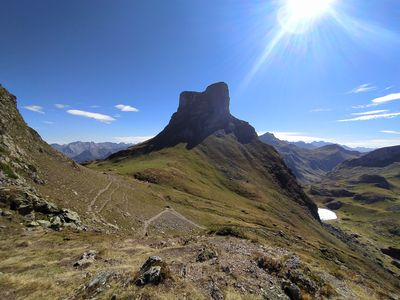

In [103]:
image =Image.open(photo_path)
image